In [1]:
import pandas as pd

# Load the dataset
file_path = 'Breast Cancer.csv'
df = pd.read_csv(file_path)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


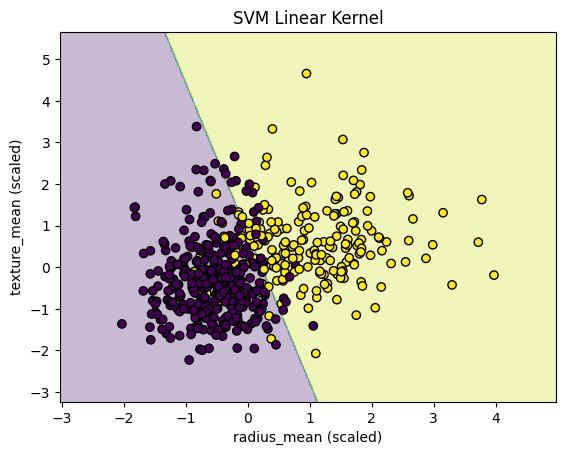

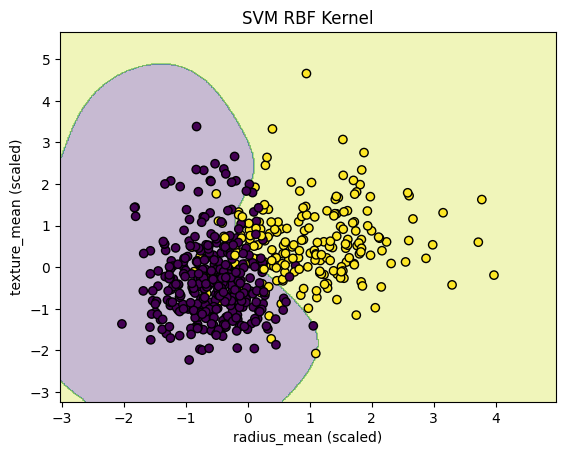

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np
import matplotlib.pyplot as plt

df = df.drop(columns=['id', 'Unnamed: 32'])

# Encode target variable
label_encoder = LabelEncoder()
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])  # M=1, B=0

# For visualization, select two features
X = df[['radius_mean', 'texture_mean']].values
y = df['diagnosis'].values

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train SVM with linear kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)

# Train SVM with RBF kernel
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)

# Function to plot decision boundaries
def plot_decision_boundary(model, X, y, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title(title)
    plt.xlabel('radius_mean (scaled)')
    plt.ylabel('texture_mean (scaled)')
    plt.show()

# Plot decision boundaries
plot_decision_boundary(svm_linear, X_scaled, y, "SVM Linear Kernel")
plot_decision_boundary(svm_rbf, X_scaled, y, "SVM RBF Kernel")


In [3]:
# Hyperparameter tuning for RBF kernel
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=0, cv=5)
grid.fit(X_train, y_train)

best_params = grid.best_params_
best_score = grid.best_score_

# Cross-validation score for best model
cv_scores = cross_val_score(grid.best_estimator_, X_scaled, y, cv=5)

best_params, best_score, cv_scores.mean()


({'C': 10, 'gamma': 0.1, 'kernel': 'rbf'},
 np.float64(0.9010989010989011),
 np.float64(0.8963204471355379))

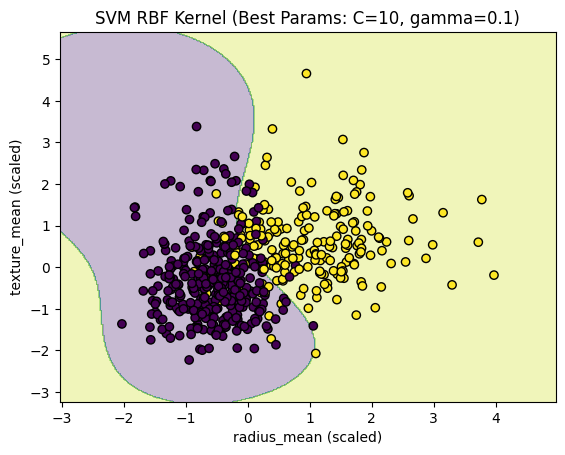

In [4]:
# Visualizing decision boundary for the best RBF model from GridSearch
best_rbf_model = grid.best_estimator_

plot_decision_boundary(best_rbf_model, X_scaled, y,
                       f"SVM RBF Kernel (Best Params: C={best_params['C']}, gamma={best_params['gamma']})")
